### 1. El más Nobel de los premios

El Premio Nobel es quizás el galardón científico más conocido del mundo. Además del honor, el prestigio y la importante cantidad de dinero del premio, el galardonado también recibe una medalla de oro que muestra a Alfred Nobel (1833 - 1896), quien estableció el premio. Cada año se otorga a científicos y académicos en las categorías de química, literatura, física, fisiología o medicina, economía y paz. El primer premio Nobel se entregó en 1901, y en aquella época el premio era muy eurocéntrico y estaba centrado en los hombres, pero hoy en día no está sesgado en absoluto. Sin duda. ¿No es así?

Bueno, ¡vamos a averiguarlo! La Fundación Nobel ha puesto a disposición un conjunto de datos de todos los premiados desde el inicio del premio, en 1901, hasta 2016. Vamos a cargarla y a echar un vistazo.
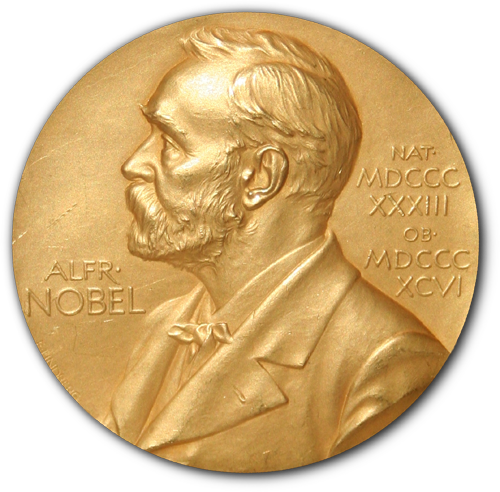

In [2]:
# Carga de las bibliotecas necesarias

import pandas as pd
import seaborn as sns
import numpy as np

# Lectura de los datos del Premio Nobel
nobel = pd.read_csv("nobel.csv")

# Un vistazo a los primeros 6 ganadores

nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


### 2. Entonces, ¿quién se lleva el Premio Nobel?

Si nos fijamos en los primeros ganadores del premio, o laureados del Nobel, como también se les llama, ya vemos una celebridad: Wilhelm Conrad Röntgen, el hombre que descubrió los rayos X. Y en realidad, vemos que todos los ganadores de 1901 eran tipos que venían de Europa. Pero eso fue en 1901, si miramos todos los ganadores en el conjunto de datos, desde 1901 hasta 2016, ¿qué sexo y qué país es el más representado?

(Para el país, utilizaremos el país_de_nacimiento del ganador, ya que el país_de_organización es NaN para todos los premios Nobel compartidos).

In [5]:
# Muestra el número de premios Nobel (posiblemente compartidos) entregados entre 1901 y 2016
display(len(nobel[(nobel['year'] >= 1901) & (nobel['year'] <= 2016)]))

# Muestra el número de premios ganados por hombres y mujeres.
display(nobel['sex'].value_counts())

# Muestra el número de premios ganados por las 10 primeras nacionalidades.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

### 3. Predominio de EE.UU.

Quizá no sea tan sorprendente: el galardonado con más frecuencia entre 1901 y 2016 fue un hombre nacido en los Estados Unidos de América. Pero en 1901 todos los ganadores eran europeos. ¿Cuándo empezó Estados Unidos a dominar las listas de premios Nobel?

In [6]:
# Calculando la proporción de ganadores nacidos en EEUU por década
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = np.floor((nobel['year']//10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False )['usa_born_winner'].mean()

# Mostrar las proporciones de ganadores nacidos en EE.UU. por década
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


### 4. El dominio de EE.UU., visualizado

Una tabla está bien, pero para ver cuándo empezó Estados Unidos a dominar las listas de los Nobel necesitamos un gráfico.

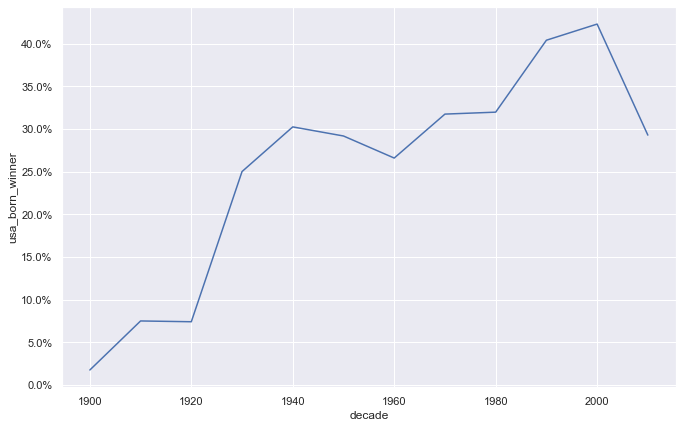

In [7]:
# Configurar el tema de la trama
sns.set(style='darkgrid')

# y establecer el tamaño de todas las parcelas.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Trazar los ganadores nacidos en EE.UU. 
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner')

# Añadiendo el formato % al eje Y
from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

### 5. ¿Cuál es el género de un típico ganador del Premio Nobel?

Estados Unidos se convirtió en el ganador dominante del Premio Nobel por primera vez en la década de 1930 y ha mantenido la posición de liderazgo desde entonces. Pero un grupo que estuvo a la cabeza desde el principio, y que parece no soltarlo nunca, son los hombres. Tal vez no debería sorprender que haya un cierto desequilibrio entre el número de ganadores de premios masculinos y femeninos, pero ¿hasta qué punto es significativo este desequilibrio? ¿Y es mejor o peor dentro de categorías específicas de premios como física, medicina, literatura, etc.?

   decade    category  female_winner
0    1900   Chemistry       0.000000
1    1900  Literature       0.100000
2    1900    Medicine       0.000000
3    1900       Peace       0.071429
4    1900     Physics       0.076923


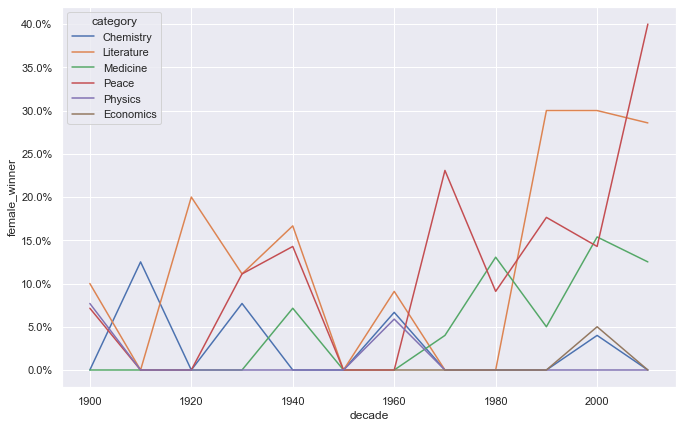

In [8]:
# Calculando la proporción de mujeres premiadas por década
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False )['female_winner'].mean()

print(prop_female_winners.head())
# Trazando los ganadores nacidos en EE.UU. con el % de ganadores en el eje de ordenadas
ax = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue = 'category')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

### 6. La primera mujer en ganar el Premio Nobel

El gráfico anterior es un poco desordenado, ya que las líneas están sobretrazadas. Pero muestra algunas tendencias y patrones interesantes. En general, el desequilibrio es bastante grande, siendo la física, la economía y la química las que presentan un mayor desequilibrio. La medicina presenta una tendencia algo positiva y, desde los años 90, el premio de literatura también está más equilibrado. El premio de la paz es el más atípico de la década de 2010, pero hay que tener en cuenta que sólo abarca los años 2010 a 2016.

Teniendo en cuenta este desequilibrio, ¿Quién fue la primera mujer en recibir un Premio Nobel? ¿Y en qué categoría?

In [9]:
# Escogiendo a la primera mujer en ganar un Premio Nobel
nobel[nobel["sex"] == "Female"].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### 7. Repetición de premios

Para la mayoría de los científicos/escritores/activistas, un Premio Nobel sería la coronación de una larga carrera. Pero para algunos, uno no es suficiente, y pocos lo han obtenido más de una vez. ¿Quiénes son estos pocos afortunados? (Al no haber ganado yo ningún Premio Nobel, asumiré que se trata sólo de suerte).

In [10]:
# Seleccionar a los galardonados que han recibido 2 o más premios.
nobel.groupby("full_name", as_index=False ).filter(lambda x : x['full_name'].shape[0]>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


### 8. ¿Cuántos años tienes cuando recibes el premio?

La lista de ganadores repetidos contiene algunos nombres ilustres. Volvemos a encontrarnos con Marie Curie, que obtuvo el premio en física por descubrir la radiación y en química por aislar el radio y el polonio. John Bardeen lo obtuvo dos veces en física por los transistores y la superconductividad, Frederick Sanger lo obtuvo dos veces en química, y Linus Carl Pauling lo obtuvo primero en química y después en la paz por su trabajo de promoción del desarme nuclear. También nos enteramos de que las organizaciones también reciben el premio, ya que tanto la Cruz Roja como el ACNUR lo han obtenido en dos ocasiones.

Pero, ¿cuántos años se tienen generalmente cuando se obtiene el premio?

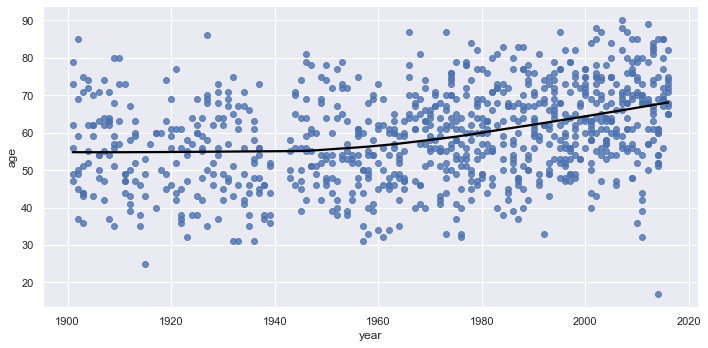

In [11]:
# Convertir birth_date de String a datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calcular la edad de los ganadores del Premio Nobel
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Trazando la edad de los ganadores del Premio Nobel
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})

### 9. Diferencias de edad entre las categorías de premios

El gráfico anterior nos muestra muchas cosas. Vemos que la gente solía tener alrededor de 55 años cuando recibía el premio, pero hoy en día la media está más cerca de los 65 años. Pero hay una gran diferencia de edad entre los premiados, y aunque la mayoría tiene más de 50 años, algunos son muy jóvenes.

También vemos que la densidad de puntos es mucho mayor hoy en día que a principios del siglo XX: hoy en día se reparten muchos más premios, por lo que hay muchos más ganadores. También vemos que hubo una interrupción en los premios otorgados alrededor de la Segunda Guerra Mundial (1939 - 1945).

Veamos las tendencias de edad dentro de las diferentes categorías de premios.

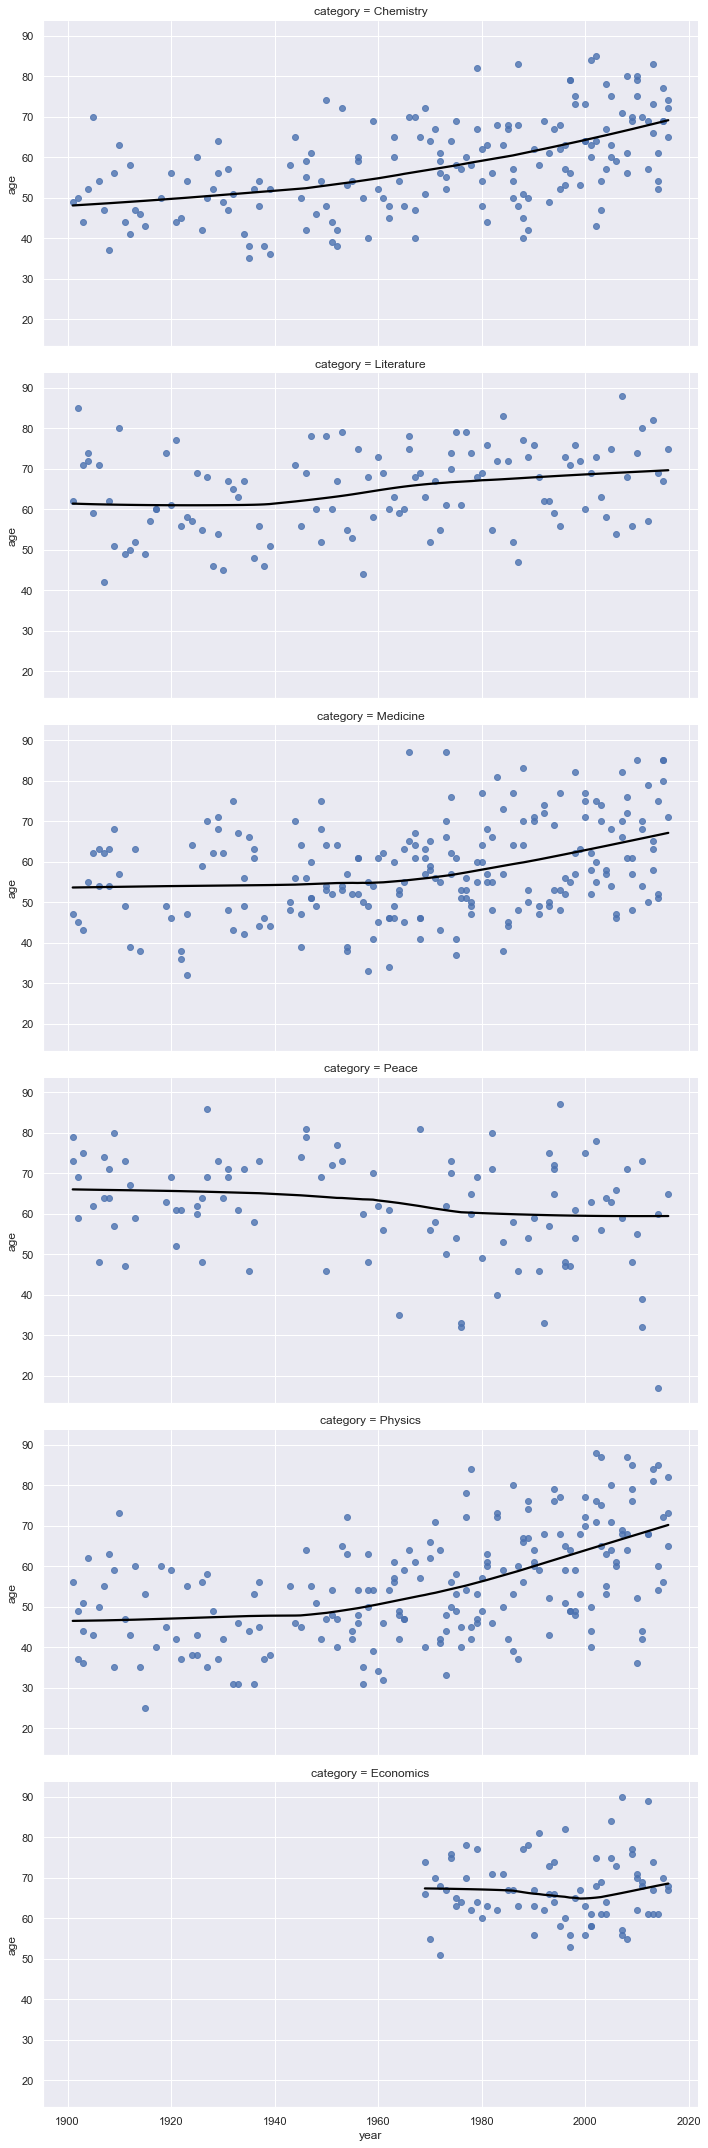

In [13]:
# El mismo gráfico anterior, pero con gráficos separados para cada tipo de Premio Nobel
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'}, row = 'category')

### 10. Ganadores más antiguos y más jóvenes

¡Más parcelas con un montón de cosas emocionantes! Vemos que los ganadores de los premios de química, medicina y física han envejecido con el tiempo. La tendencia es más fuerte en el caso de la física: la edad media solía estar por debajo de los 50 años, y ahora es de casi 70. La literatura y la economía son más estables. También vemos que la economía es una categoría más reciente. Pero la paz muestra una tendencia opuesta: ¡los ganadores son cada vez más jóvenes!

En la categoría de paz también tenemos un ganador en torno a 2010 que parece excepcionalmente joven. Esto nos lleva a preguntarnos quiénes son las personas más jóvenes y más viejas que han ganado un Premio Nobel.

In [14]:
# El ganador más antiguo de un Premio Nobel a partir de 2016
display(nobel.nlargest(n=1, columns='age'))

# El ganador más joven de un Premio Nobel en 2016
nobel.nsmallest(n=1, columns='age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


### 11. ¡Tienes un premio!

Oye, tienes un premio por haber llegado hasta el final de este cuaderno. Puede que no sea un Premio Nobel, pero lo he hecho yo mismo en pintura, así que debería contar para algo. Pero no desesperes, Leonid Hurwicz tenía 90 años cuando recibió su premio, así que puede que no sea demasiado tarde para ti. Quién sabe.

Antes de que te vayas, ¿Cómo se llama la ganadora más joven de la historia, que en 2014 recibió el premio por "su lucha contra la supresión de los niños y los jóvenes y por el derecho de todos los niños a la educación"?

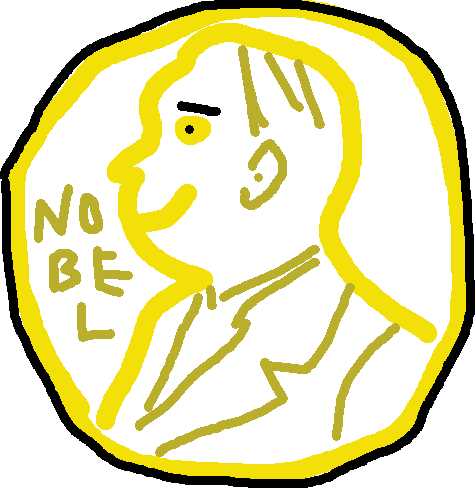

In [15]:
# El nombre del ganador más joven del Premio Nobel a partir de 2016
youngest_winner =  'Malala'
print(str(nobel.nsmallest(1, 'age').full_name))

885    Malala Yousafzai
Name: full_name, dtype: object
